Problem Statement: Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or 
previntive measures to stop or control the attrition.

Attrition Def: Attrition is a term used to describe the gradual and natural reduction in the size of a workforce or customer base over time, typically due to voluntary or involuntary departures, such as resignations,  retirements, terminations, or death. It is often used in the context of human resources or customer management, and can have both positive and negative effects on an organization.

In a positive sense, attrition can help an organization to remove low-performing employees, create room for new talent, and save on costs associated with redundant positions. In a negative sense, however, attrition can result in the loss of experienced and valuable employees or customers, and can increase recruitment and training costs.

Attrition is often measured using metrics such as employee turnover rate or customer churn rate, and organizations may develop strategies to minimize attrition and retain their workforce or customer base.

  Attrition Rate = No. of employees left the workforce/Avg.no. of employess



1.Historical Data: (HR_Employee_Attrition_Data.csv) provided by LEARNBAY.

-The dataset contains Employee demographic information(age, gender, occupation, tenure etc).
-Reasons for leaving or discontinuing use (e.g. better job opportunity,  dissatisfaction, retirement, etc)
-Tenure, years at the current role etc.
-Employee saalry and other perks.
-Performance metrics (performance rating/satisfaction, job satisfaction).

2.How to use the information provided in the dataset?

-Identifying the key features to find the reasons and drwaing insights to   undestand the reason for employee turnover by  expolring and analysing the features and patterns.

3.How your analysis and insghts drawn help HR department?
-Targeted interventions to address the specific issues that are driving employees away.
-To improve the onboarding process and ensure that new employees feel supported and engaged from day one.
-Implement interventions to improve employee satisfaction and engagement.
-To provide benifits, oppurtunities for career growth by creating positive  work culture.


Attrition data analysis(EDA) icludes
-Understanding the data.
-Pre-processing the data.
-Exploring the data.
-Transform the data.
-Data Modeling.
-Data Visualization.
-Data Communication.

# Exploratory data analysis(Attrition Dataset)

Import all the modules and the libraries required

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#import the dataset
df = pd.read_csv('cleaned_dataset_Attrition.csv')

In [3]:
df.head(10)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,No,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,No,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,No,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,No,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,No,36,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


In [4]:
df.shape

(1470, 31)

In [5]:
df.info() #to check null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
df.isnull().values.any() #Checking if any missing values present

False

In [7]:
# del df['Unnamed: 10']

In [8]:
df.isnull().values.sum()

0

In [9]:
df.describe() # 5 Number Summary

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


The 'Attrition' feature will be our dependent variable/feature and rest all independent valriables/features

In [11]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [12]:
len(df.select_dtypes(include='object').columns)

8

In [13]:
# numerical columns
df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
len(df.select_dtypes(include='int64').columns)

23

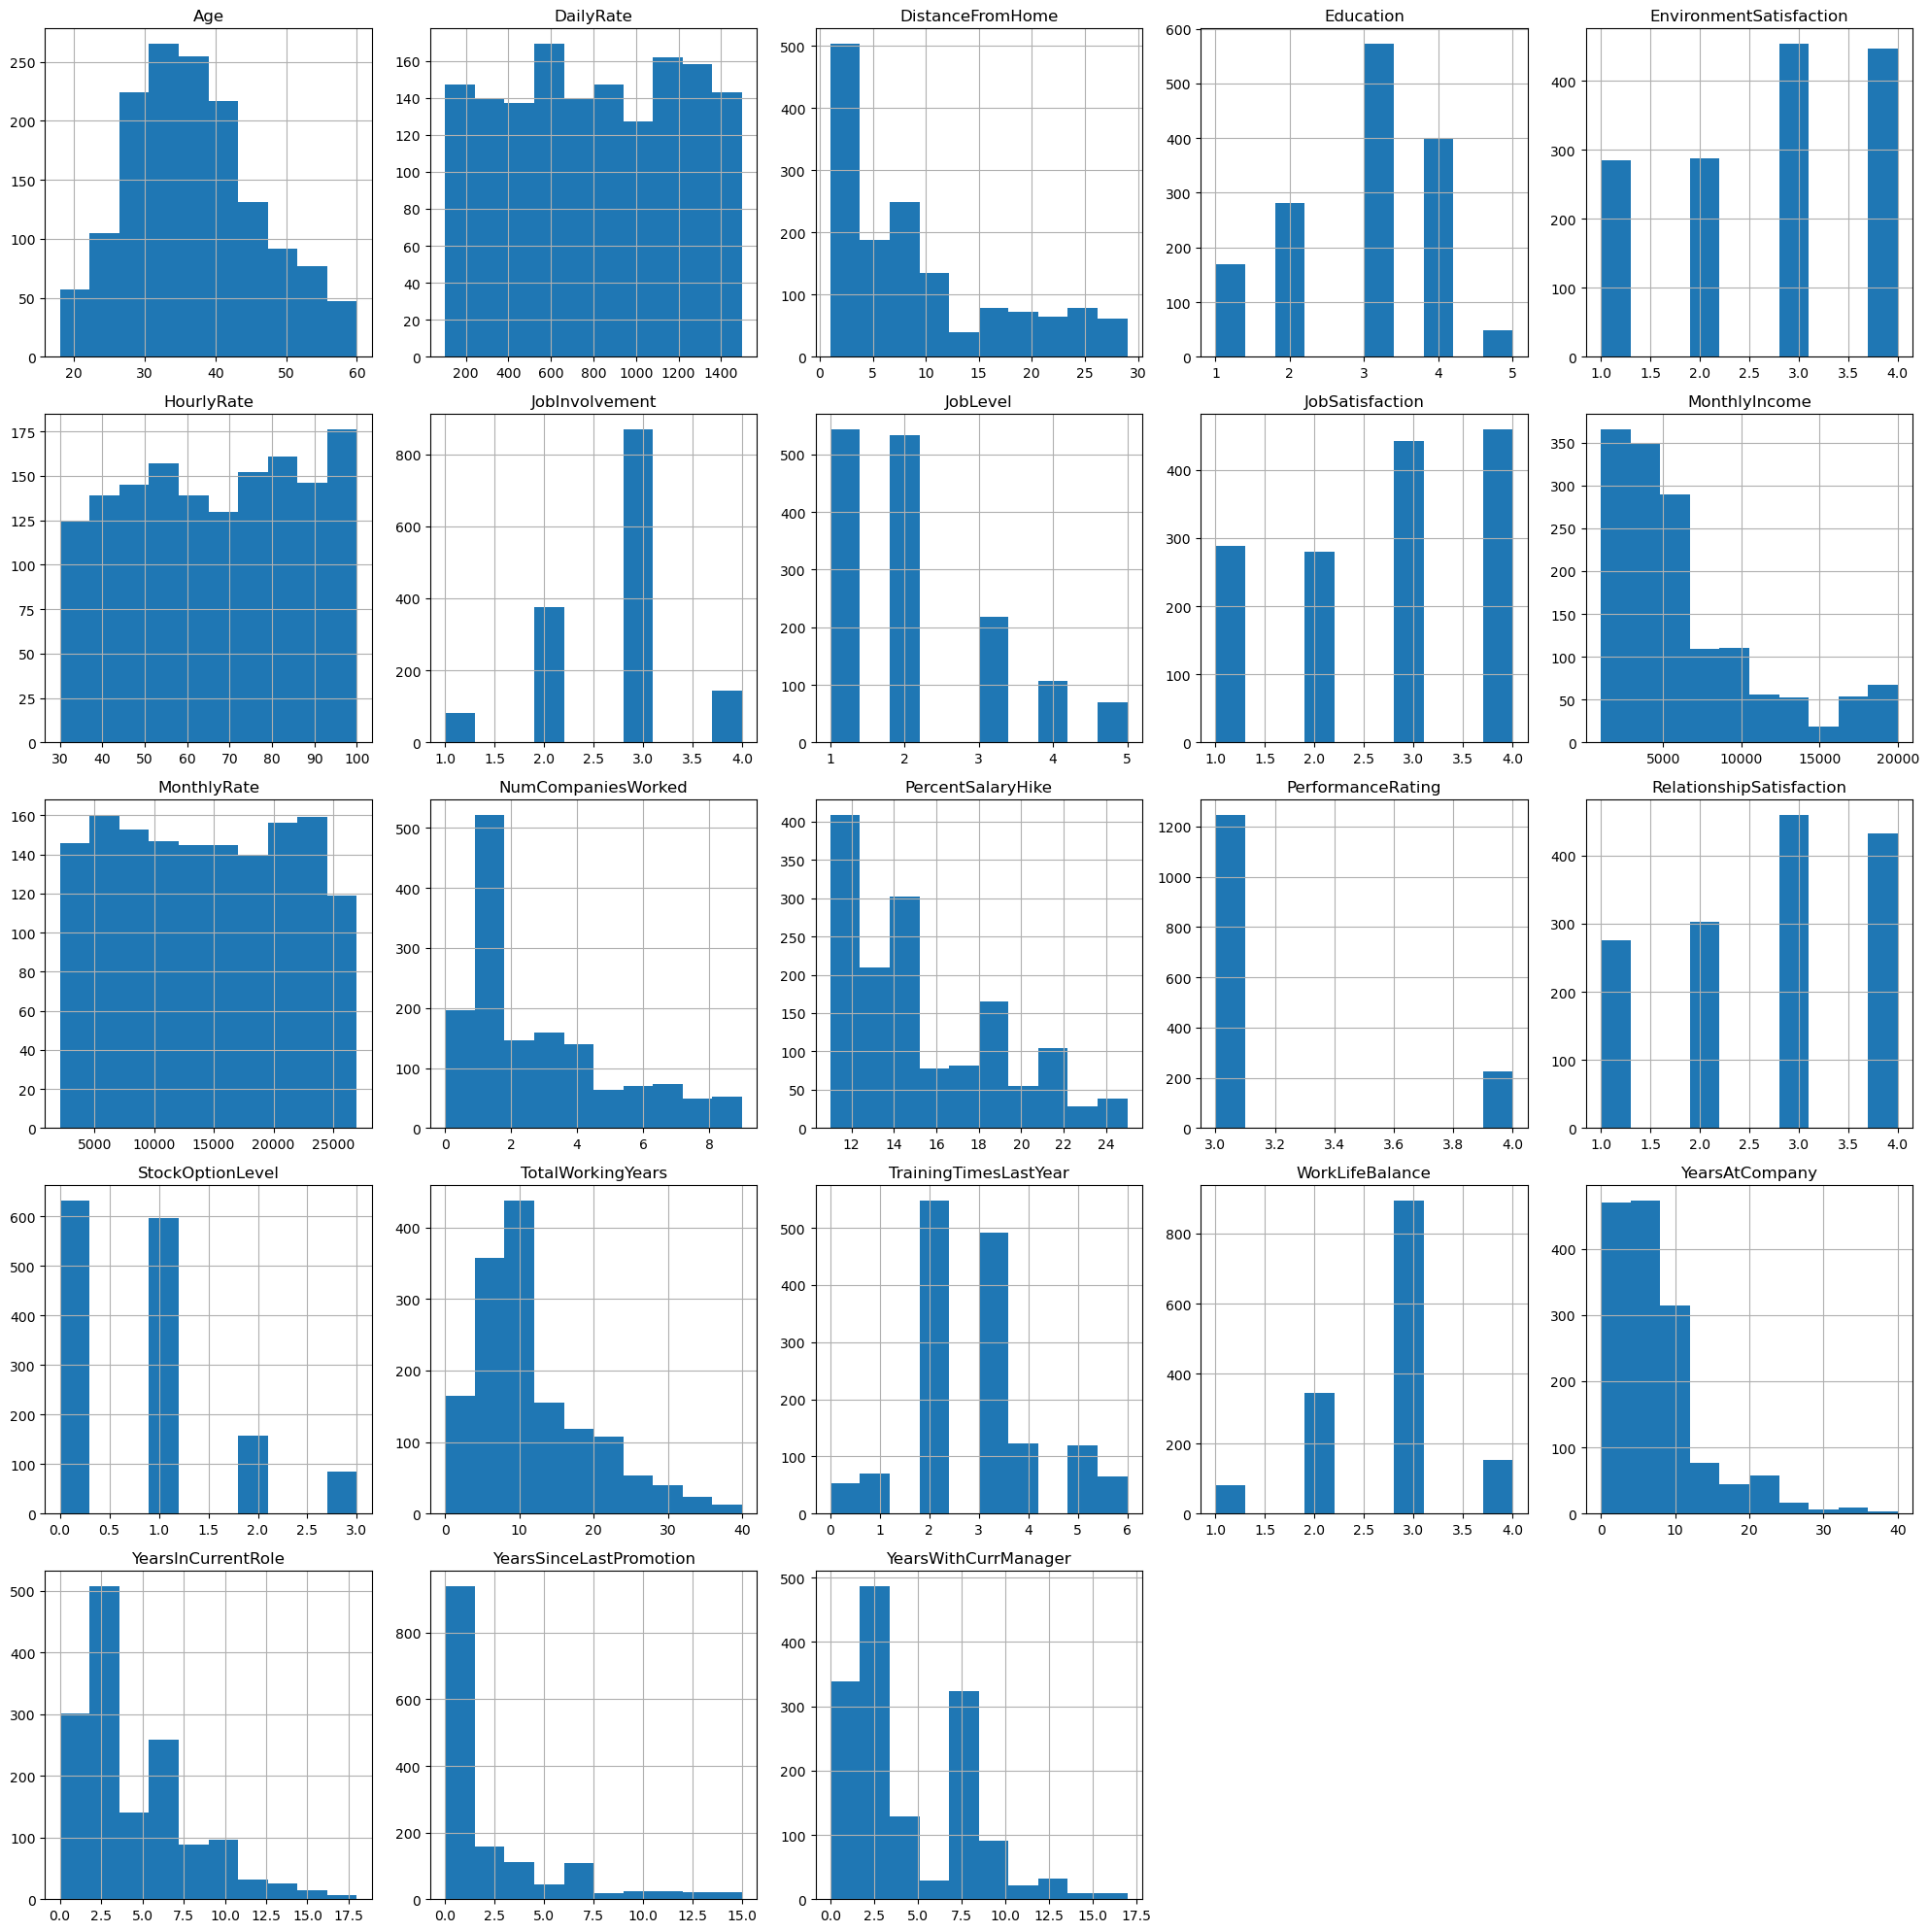

In [15]:
df.hist(figsize =(20,20))
plt.tight_layout()
plt.show()

In [16]:
df.Age.skew(), df.DistanceFromHome.skew(), df.MonthlyIncome.skew(), df.NumCompaniesWorked.skew(),
df.PercentSalaryHike.skew(), df.TotalWorkingYears.skew(), df.YearsAtCompany.skew(), df.YearsInCurrentRole.skew()

(0.8211279755780908,
 1.1171718528128527,
 1.7645294543422085,
 0.9173631562908262)

In [17]:
df.Age.kurtosis(), df.DistanceFromHome.kurtosis(), df.MonthlyIncome.kurtosis(), df.NumCompaniesWorked.kurtosis(),
df.PercentSalaryHike.kurtosis(), df.TotalWorkingYears.kurtosis(), df.YearsAtCompany.kurtosis(), df.YearsInCurrentRole.kurtosis()

(-0.30059822209054543,
 0.918269536621358,
 3.93550875575465,
 0.47742077351356293)

By seeing the Histograms we cany say that most of the distibutions are right-skewed.
Age feature is not that right skewed. most of the employees are between 25-40 years age group.
Features like EmployeeCount and StandardHours can be ignored as they donot have relevant information useful to us.

In [18]:
# # #We can drop columns/features of no important or relavent
# df['EmployeeCount'].nunique()


In [19]:
# df['EmployeeNumber'].nunique()


In [20]:
# df['Over18'].nunique()


In [21]:
# df['StandardHours'].nunique()

In [22]:
# df = df.drop(columns=['EmployeeCount', 'EmployeeNumber' ,'Over18', 'StandardHours'])

In [23]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [24]:
df.shape #we have dropped 3 features so shape (2940,32)

(1470, 31)

In [25]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


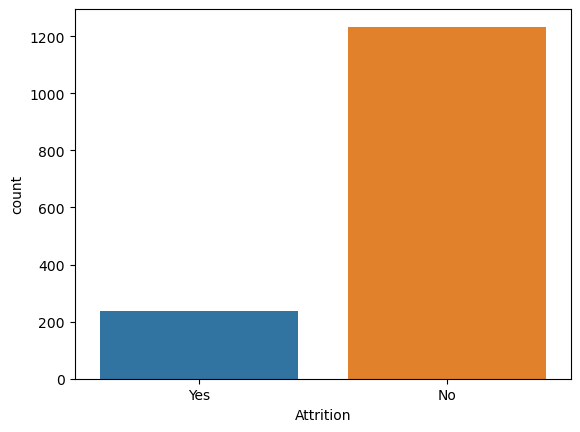

In [26]:
sns.countplot(df['Attrition']) 
plt.show()
#Attrition Count (tells about the employees left and working in the company)

In [27]:
# Employees left the company
(df.Attrition == 'Yes').sum()

237

In [28]:
# Employees with the company
(df.Attrition == 'No').sum()

1233

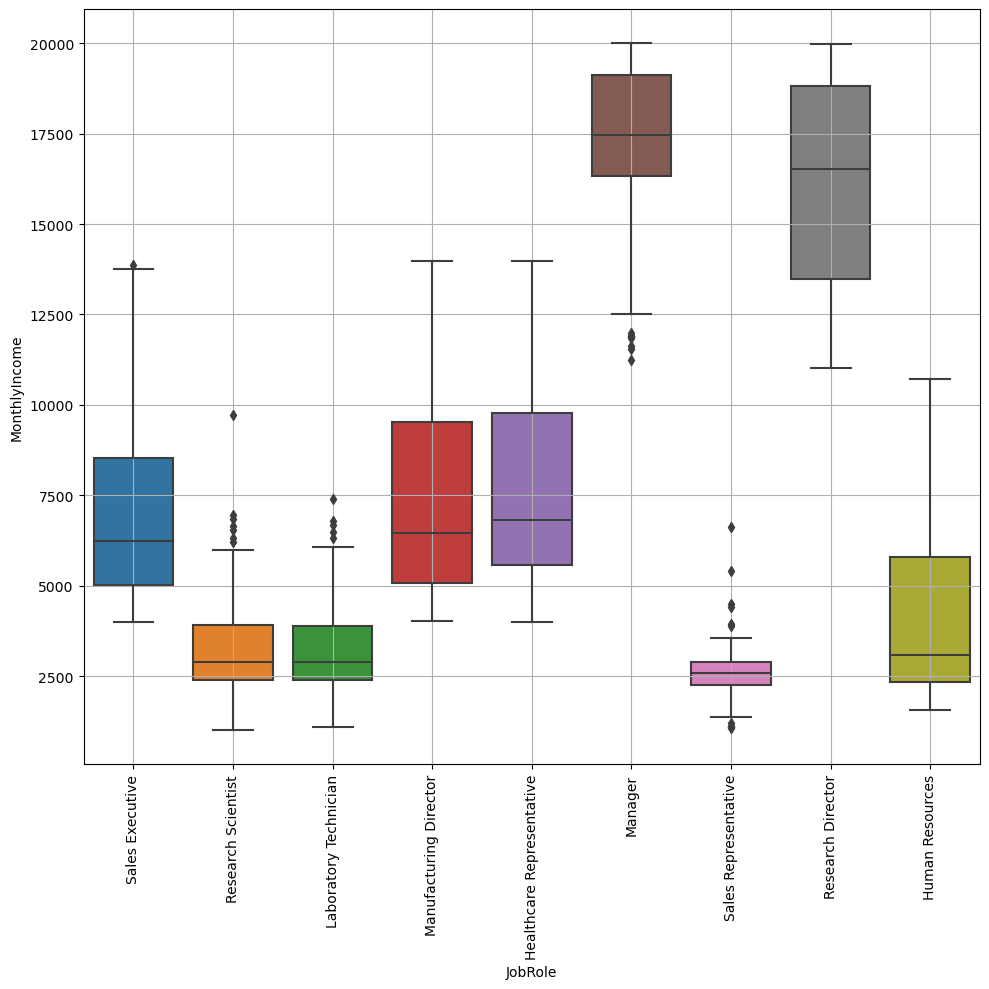

In [29]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'], x=df['JobRole'])
plt.grid(True, alpha =1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

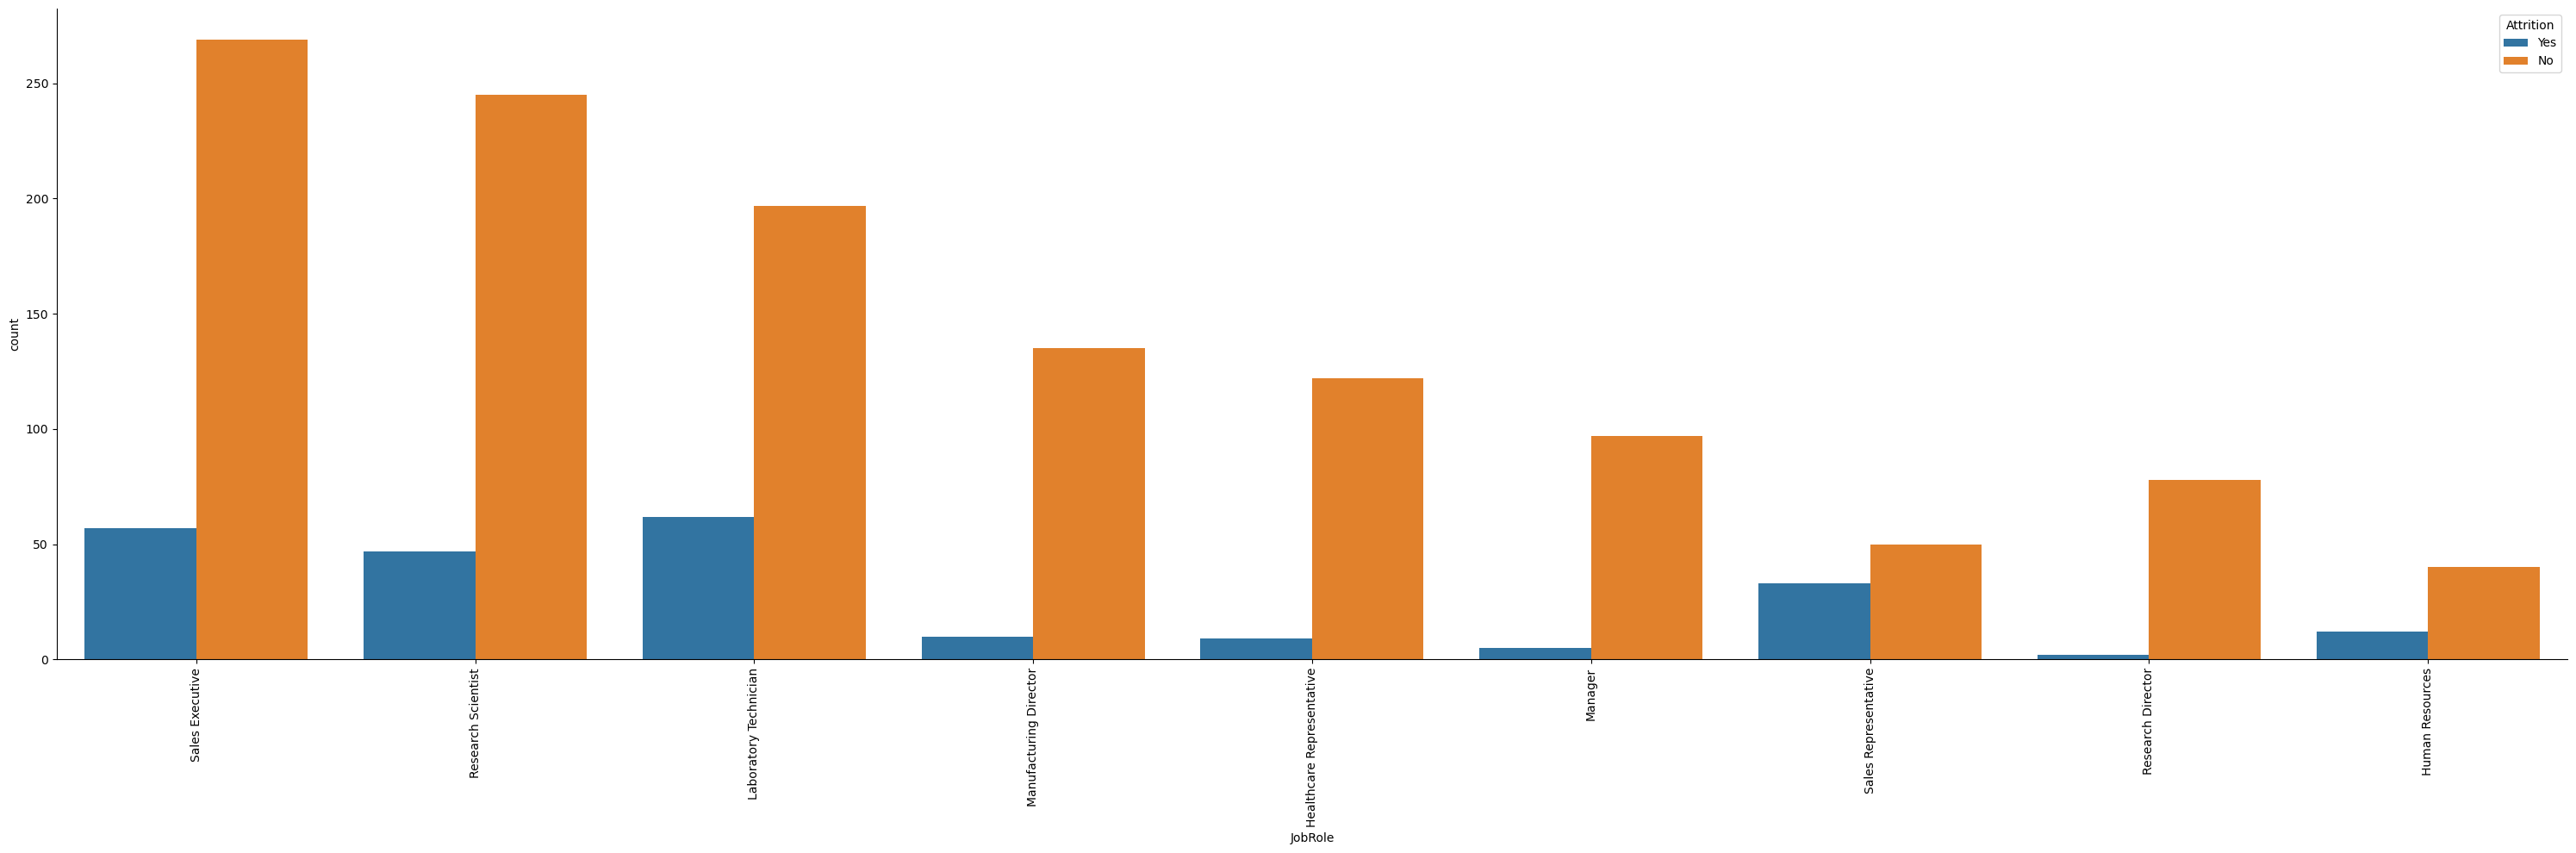

In [30]:
# fig, ax = plt.subplots(1, figsize=(10, 10))
sns.catplot(x='JobRole', hue ='Attrition', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Department', ylabel='count'>

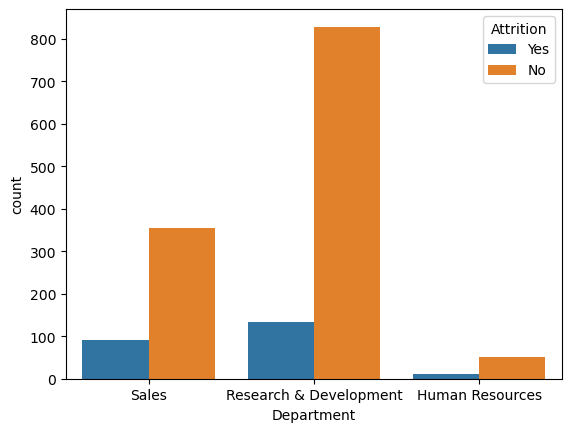

In [31]:

sns.countplot(x='Department', hue='Attrition', data=df)


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

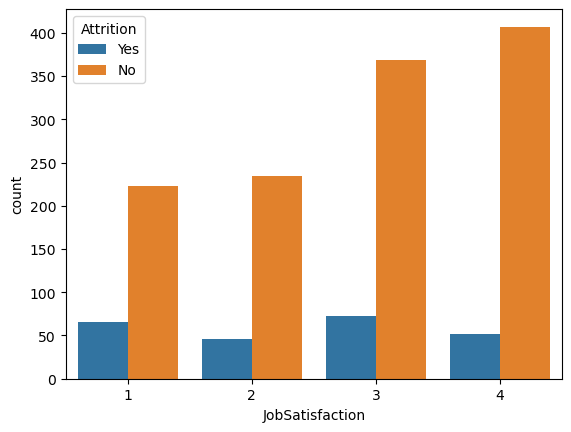

In [32]:

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)

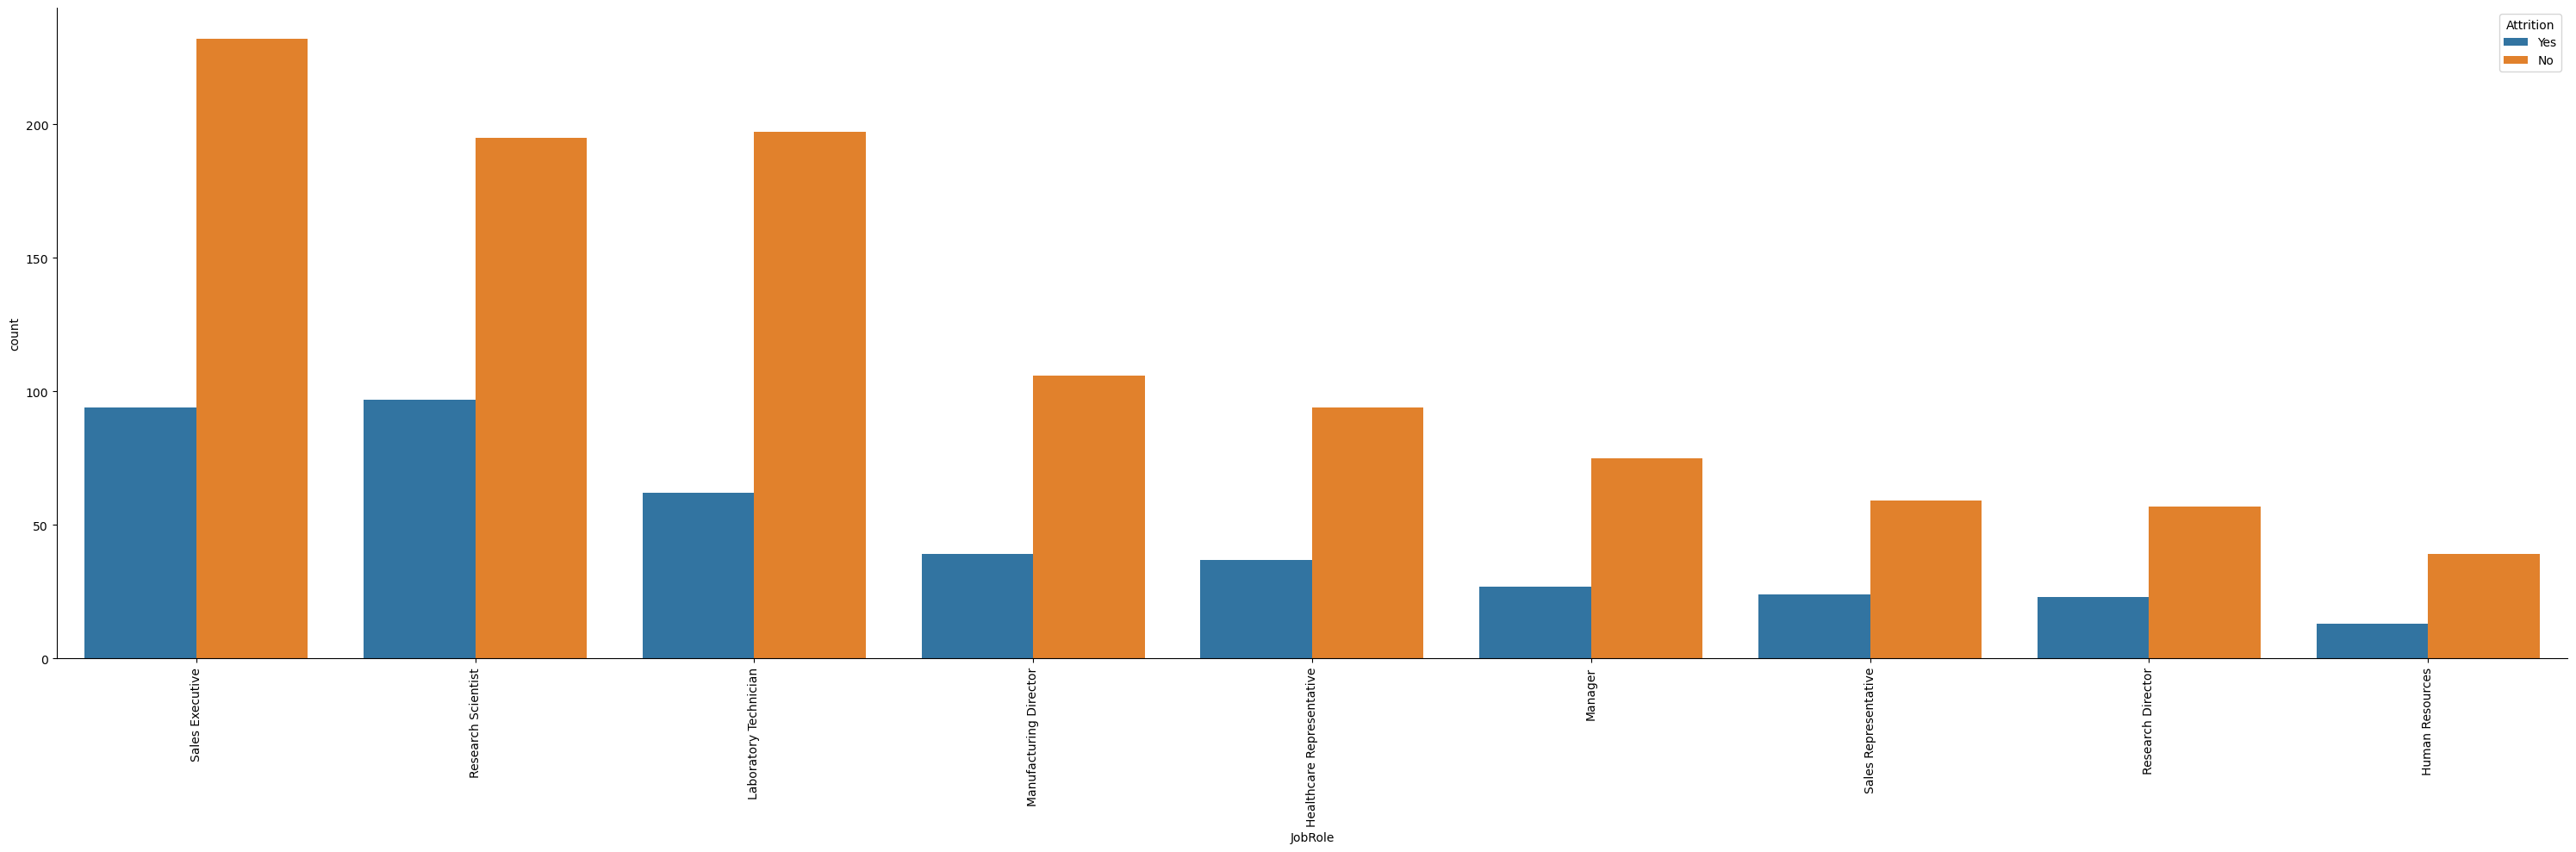

In [33]:
sns.catplot(x='JobRole', hue ='OverTime', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

In [34]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [35]:
#converting object datatypes to categorical datatypes.
for column in df.columns:
    if df[column].dtype =='object':
        df[column] = df[column].astype('category')
        df[column] = df[column].astype('category').cat.codes
        

In [36]:
corr = df.corr()

In [37]:
corr

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.000074,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,-0.056652,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.063991,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.077924,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.026846,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,-0.103369,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,-0.036311,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


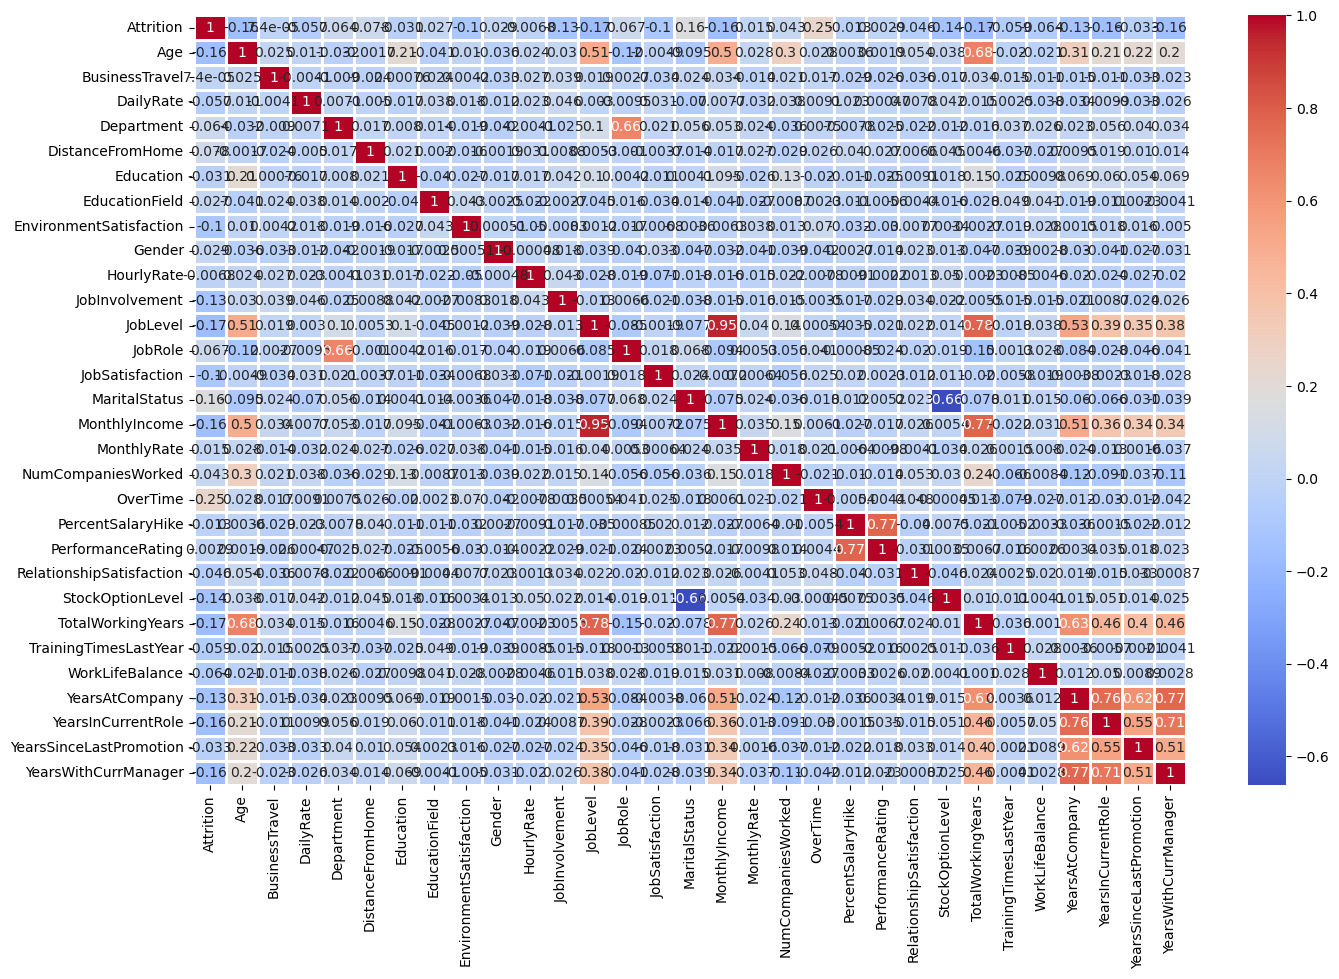

In [38]:
#Map/Matrix showing correlation between features
plt.figure(figsize =(16,10))
ax = sns.heatmap(corr, annot=True, linewidths =1, cmap='coolwarm')

In [39]:
corr_matrix = df.corr()

# Find highly correlated features
corr_threshold = 0.4
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[corr_matrix.columns[i] + " - " + corr_matrix.columns[j]] = corr_matrix.iloc[i, j]

# Print highly correlated features
for pair, corr in corr_pairs.items():
    print(pair + " : " + str(corr))

JobLevel - Age : 0.5096042284323842
JobRole - Department : 0.6624311978258447
MonthlyIncome - Age : 0.4978545669265801
MonthlyIncome - JobLevel : 0.9502999134798473
PerformanceRating - PercentSalaryHike : 0.7735499964012664
StockOptionLevel - MaritalStatus : -0.6625772916604346
TotalWorkingYears - Age : 0.6803805357911985
TotalWorkingYears - JobLevel : 0.7822078045362748
TotalWorkingYears - MonthlyIncome : 0.7728932462543574
YearsAtCompany - JobLevel : 0.5347386873756308
YearsAtCompany - MonthlyIncome : 0.5142848257331957
YearsAtCompany - TotalWorkingYears : 0.6281331552682468
YearsInCurrentRole - TotalWorkingYears : 0.46036463801180993
YearsInCurrentRole - YearsAtCompany : 0.7587537366134619
YearsSinceLastPromotion - TotalWorkingYears : 0.4048577585025587
YearsSinceLastPromotion - YearsAtCompany : 0.6184088652176047
YearsSinceLastPromotion - YearsInCurrentRole : 0.5480562476995187
YearsWithCurrManager - TotalWorkingYears : 0.45918839708314385
YearsWithCurrManager - YearsAtCompany : 0.

In [40]:
# calculate correlation coefficients
correlations = df.corr()['Attrition'].drop('Attrition')

# print correlation coefficients in descending order
print(correlations.sort_values(ascending=False))

OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
Y

In [41]:
#Split the dataset for training testing
# features


X = df.drop(columns='Attrition', axis= 1)
# target variable
y = df['Attrition']

In [42]:
#important features for predicting Attrition
from sklearn.ensemble import ExtraTreesClassifier
# Tree-based feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
k = 35
# get the feature importances and indices of top k features
importances = pd.Series(model.feature_importances_, index=X.columns)
indices = importances.sort_values(ascending=False)[:k].index

# select the top k features from the original DataFrame
X_selected = df[indices]
# save the x_selected DataFrame to a CSV file
# X_selected.to_csv('top_featuresLR.csv', index=False)

In [43]:
X_selected

,OverTime,Age,MonthlyIncome,EnvironmentSatisfaction,TotalWorkingYears,DistanceFromHome,JobSatisfaction,JobInvolvement,MaritalStatus,JobRole,...,PercentSalaryHike,YearsSinceLastPromotion,StockOptionLevel,TrainingTimesLastYear,EducationField,Education,Department,BusinessTravel,Gender,PerformanceRating
0,1,41,5993,2,8,1,4,3,2,7,...,11,0,0,0,1,2,2,2,0,3
1,0,49,5130,3,10,8,2,2,1,6,...,23,1,1,3,1,1,1,1,1,4
2,1,37,2090,4,7,2,3,2,2,2,...,15,0,0,3,4,2,1,2,1,3
3,1,33,2909,4,8,3,3,3,1,6,...,11,3,0,3,1,4,1,1,0,3
4,0,27,3468,1,6,2,2,3,1,2,...,12,2,1,3,3,1,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,2571,3,17,23,4,4,1,2,...,17,0,1,3,3,2,1,1,1,3
1466,0,39,9991,4,9,6,1,2,1,0,...,15,1,1,5,3,1,1,2,1,3
1467,1,27,6142,2,6,4,2,4,1,4,...,20,0,1,0,1,3,1,2,1,4
1468,0,49,5390,4,17,2,2,2,1,7,...,14,0,0,3,3,3,2,1,1,3


By seeing the correlation matrix we can infer that 'Attrition (Target Feature) has -ve correlation with 'Age, JobInvolvement, JobLevel, MontlyIncome, JobSatisfaction, etc., +ve corelation with OverTime, DistanceFromHome, NumberofCompaniesWorked etc

# Splitting the dataset in 80:20(80% train data, 20% test data)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape, type(X_train))

(1176, 30) <class 'pandas.core.frame.DataFrame'>


In [46]:
print(y_train.shape, type(y_train))

(1176,) <class 'pandas.core.series.Series'>


In [47]:
print(X_test.shape, type(X_test))

(294, 30) <class 'pandas.core.frame.DataFrame'>


In [48]:
print(y_test.shape, type(y_test))

(294,) <class 'pandas.core.series.Series'>


# Feature Sclaing/Standerdization

In [49]:
#Standerdization of data/Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
print(X_train, X_train.shape, type(X_train))

[[-1.38855944  0.58928051 -1.10813858 ... -0.88820751 -0.67610953
  -1.14244794]
 [-2.04073779 -2.46355596 -1.2634814  ... -1.1650514  -0.67610953
  -1.14244794]
 [-0.84507748  0.58928051  1.10364737 ... -0.61136361 -0.67610953
  -0.57508359]
 ...
 [-1.60595222 -0.93713773  1.1258392  ... -1.1650514  -0.67610953
  -1.14244794]
 [-0.84507748  0.58928051  1.42666182 ... -0.33451971 -0.67610953
  -0.29140142]
 [ 1.43754676  0.58928051 -1.32019386 ... -1.1650514  -0.67610953
  -1.14244794]] (1176, 30) <class 'numpy.ndarray'>


In [51]:
print(y_train.shape, type(y_train))

(1176,) <class 'pandas.core.series.Series'>


In [52]:
print(X_test,X_test.shape, type(X_test))

[[-0.95377387  0.58928051  0.16419314 ... -0.05767581 -0.35524399
  -0.29140142]
 [ 1.76363593  0.58928051  0.70172863 ... -0.61136361 -0.35524399
  -0.29140142]
 [-1.38855944  0.58928051 -1.37937208 ... -1.1650514  -0.67610953
  -1.14244794]
 ...
 [ 1.43754676  0.58928051  1.28857931 ... -0.61136361 -0.35524399
  -0.57508359]
 [ 0.02449366  0.58928051  1.04940067 ... -1.1650514  -0.67610953
  -1.14244794]
 [ 1.11145758  0.58928051 -1.35718025 ...  0.49601198  1.56994925
   0.84332728]] (294, 30) <class 'numpy.ndarray'>


In [53]:
print(y_test.shape, type(y_test))

(294,) <class 'pandas.core.series.Series'>


Our objective is to predict the Attrition and give insights to HR Department to make further strategies to retain the talent and to find the replacement at the earliest.

Predicting Attrition (Target Feature) is a supervised binary classification task ( Either the employee stays or leaves the Company i.e. 1,0). 
There are different type of Supervised Machine Learning Algorithms to classify the features and a predict the future with best accuracy.
1.Decision Tree Classification
2.Random Forest
3.Logistic Regression
4.SVM Algorithm
We will compare accuracy scores for estimated predictions by the above mentioned classification models and predict the Attrition with best accuracy.
we need to train the Model and test the trained model to predict the future followed by Model Evaluation.


In [54]:
model.feature_importances_

array([0.04204963, 0.02328901, 0.03182415, 0.02426347, 0.0362978 ,
       0.02664502, 0.02990025, 0.03883345, 0.02185586, 0.03360716,
       0.0353284 , 0.03453197, 0.03473215, 0.03567191, 0.03480873,
       0.04099782, 0.03219868, 0.03302829, 0.06995171, 0.03117773,
       0.01281165, 0.03253543, 0.0309118 , 0.03869079, 0.03028958,
       0.03192225, 0.03429912, 0.03357035, 0.03096535, 0.03301049])

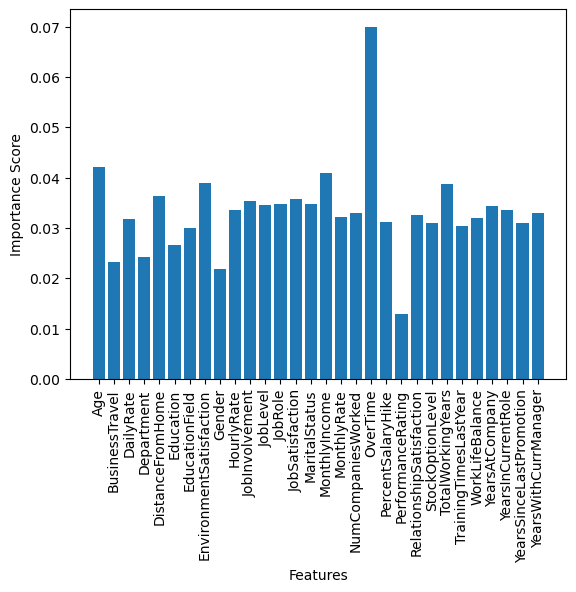

In [55]:
import matplotlib.pyplot as plt

# Assume that you have a trained model called 'model'
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Replace 'X' with your feature matrix

# Create a bar plot of feature importances
plt.bar(feature_names, feature_importances)

# Set the x-axis label
plt.xlabel('Features')

# Set the y-axis label
plt.ylabel('Importance Score')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Save the figure
plt.savefig('feature_importancesLR.png')


In [56]:

# Create a pandas DataFrame of the feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Save the DataFrame to a CSV file
feature_importances_df.to_csv('feature_importancesLR.csv', index=False)

# Logistic Regression Model


In [57]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [58]:
logreg.C

1.0

In [59]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
logreg.coef_

array([[-0.23398133, -0.01352173, -0.08624041,  0.3825362 ,  0.27819881,
         0.07674919,  0.1010093 , -0.36289999,  0.19004648,  0.01452591,
        -0.31638333, -0.43135625, -0.13233285, -0.4088323 ,  0.44787866,
        -0.18814443,  0.07622612,  0.46903461,  0.86910945, -0.11912734,
         0.04165215, -0.16026495, -0.19755481, -0.37863849, -0.16000687,
        -0.19977595,  0.69276916, -0.670105  ,  0.46442352, -0.43955753]])

In [61]:
coefs = pd.Series(index=X.columns,data=logreg.coef_[0])

In [62]:
coefs = coefs.sort_values()

In [63]:
coefs

YearsInCurrentRole         -0.670105
YearsWithCurrManager       -0.439558
JobLevel                   -0.431356
JobSatisfaction            -0.408832
TotalWorkingYears          -0.378638
EnvironmentSatisfaction    -0.362900
JobInvolvement             -0.316383
Age                        -0.233981
WorkLifeBalance            -0.199776
StockOptionLevel           -0.197555
MonthlyIncome              -0.188144
RelationshipSatisfaction   -0.160265
TrainingTimesLastYear      -0.160007
JobRole                    -0.132333
PercentSalaryHike          -0.119127
DailyRate                  -0.086240
BusinessTravel             -0.013522
HourlyRate                  0.014526
PerformanceRating           0.041652
MonthlyRate                 0.076226
Education                   0.076749
EducationField              0.101009
Gender                      0.190046
DistanceFromHome            0.278199
Department                  0.382536
MaritalStatus               0.447879
YearsSinceLastPromotion     0.464424
N

Linear Kernal

In [64]:
y_pred=logreg.predict(X_test)

Polynomial Kernal

In [65]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[249,   6],
       [ 25,  14]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

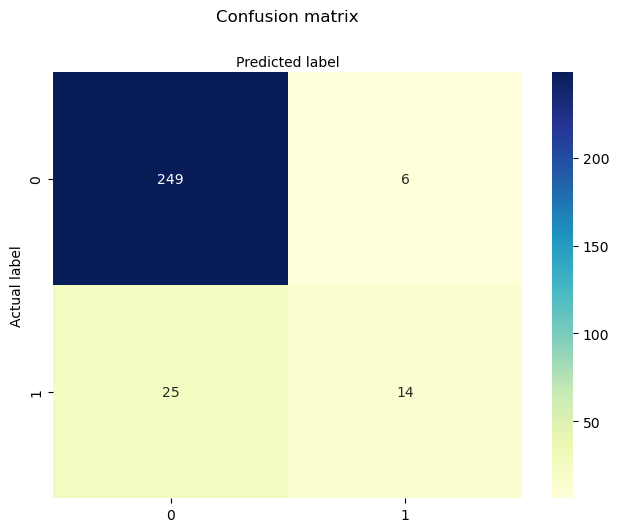

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8945578231292517
Precision: 0.7
Recall: 0.358974358974359


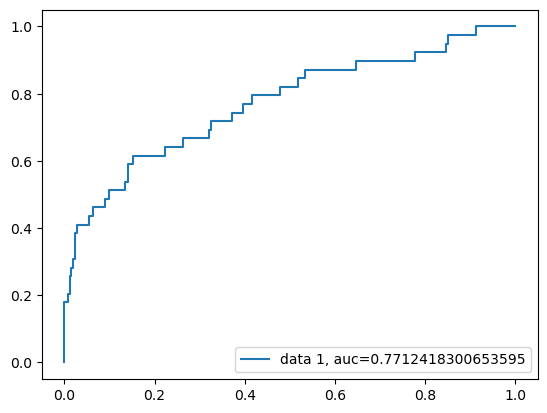

In [68]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\swara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


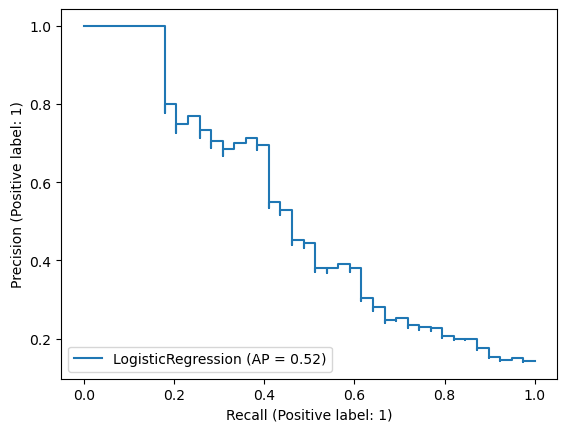

In [70]:
plot_precision_recall_curve(logreg,X_test,y_test)

C:\Users\swara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


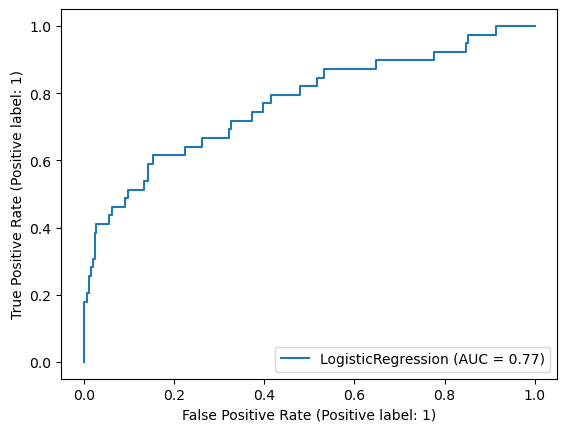

In [71]:
plot_roc_curve(logreg,X_test,y_test)